In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('imdb_movies.csv')
print("total rows: ", len(df))
df.head()

total rows:  10178


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


<Axes: >

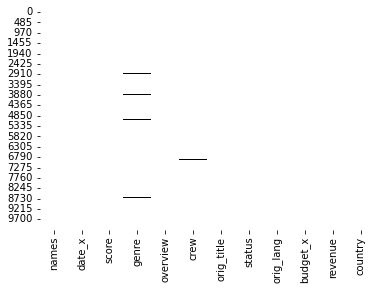

In [8]:
# missing data
sns.heatmap(df.isnull(), cbar=False, cmap='gray_r')

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['genre']]=imputer.fit_transform(df[['genre']])

In [28]:
df.dropna(subset=['crew'], inplace=True)
df.shape

(10122, 12)

In [30]:
df.head(1)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,271616668.0,AU


In [32]:
df['text'] = df['names']+' '+df['genre'] +' '+df['overview']+' '+df['crew']
df['text']

0        Creed III Drama, Action After dominating the b...
1        Avatar: The Way of Water Science Fiction, Adve...
2        The Super Mario Bros. Movie Animation, Adventu...
3        Mummies Animation, Comedy, Family, Adventure, ...
4        Supercell Action Good-hearted teenager William...
                               ...                        
10173    20th Century Women Drama In 1979 Santa Barbara...
10174    Delta Force 2: The Colombian Connection Action...
10175    The Russia House Drama, Thriller, Romance Barl...
10176    Darkman II: The Return of Durant Action, Adven...
10177    The Swan Princess: A Royal Wedding Animation, ...
Name: text, Length: 10122, dtype: object

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
vectorizer = TfidfVectorizer(max_features=1000,
                            stop_words='english',
                            lowercase=True,
                            tokenizer= word_tokenize)
X = vectorizer.fit_transform(df['text'])
X.shape

c:\Users\ZAID\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(10122, 1000)